In [1]:
import numpy as np
from sklearn.datasets import fetch_20newsgroups
from sklearn import decomposition
from scipy import linalg
import matplotlib.pyplot as plt


In [2]:
%matplotlib inline
np.set_printoptions(suppress=True)

In [3]:
categories = ['alt.atheism', 'talk.religion.misc', 'comp.graphics', 'sci.space']
remove = ('headers', 'footers', 'quotes')
newsgroups_train = fetch_20newsgroups(subset='train', categories=categories, remove=remove)
newsgroups_test = fetch_20newsgroups(subset='test', categories=categories, remove=remove)

In [4]:
newsgroups_test.target_names


['alt.atheism', 'comp.graphics', 'sci.space', 'talk.religion.misc']

In [5]:
### Methods to count words and vectorize them
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer

In [6]:
vectorizer = CountVectorizer(stop_words='english')
vectors = vectorizer.fit_transform(newsgroups_train.data).todense()
vectors.shape

(2034, 26576)

In [7]:
vocab = np.array(vectorizer.get_feature_names())

In [ ]:
vectorizer.get_feature_names()

In [9]:
vocab[7000:7030]

array(['cosmonauts', 'cosmos', 'cosponsored', 'cost', 'costa', 'costar',
       'costing', 'costly', 'costruction', 'costs', 'cosy', 'cote',
       'couched', 'couldn', 'council', 'councils', 'counsel',
       'counselees', 'counselor', 'count', 'countdown', 'counted',
       'counter', 'counter_clockwise', 'counterargument',
       'counterclockwise', 'countered', 'counterexamples',
       'counterfactual', 'counterpart'], dtype='<U80')

In [10]:
%time U, s, Vh = linalg.svd(vectors, full_matrices=False)

CPU times: user 1min 1s, sys: 1.77 s, total: 1min 3s
Wall time: 47.6 s


Confirm this is a decomposition

In [11]:
np.linalg.norm(U @ np.diag(s) @ Vh - vectors)

3.06596146123514e-12

In [12]:
np.diag(s)

array([[433.92698542,   0.        ,   0.        , ...,   0.        ,
          0.        ,   0.        ],
       [  0.        , 291.51012741,   0.        , ...,   0.        ,
          0.        ,   0.        ],
       [  0.        ,   0.        , 240.71137677, ...,   0.        ,
          0.        ,   0.        ],
       ...,
       [  0.        ,   0.        ,   0.        , ...,   0.        ,
          0.        ,   0.        ],
       [  0.        ,   0.        ,   0.        , ...,   0.        ,
          0.        ,   0.        ],
       [  0.        ,   0.        ,   0.        , ...,   0.        ,
          0.        ,   0.        ]])

In [13]:
# Confirm that U and Vh are orthonormal
np.allclose(U @ U.T, np.eye(U.shape[0]))

True

In [14]:
np.allclose(Vh @ Vh.T, np.eye(Vh.shape[0]))

True

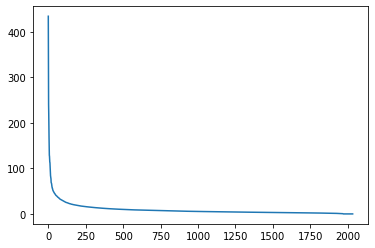

In [15]:
plt.plot(s)

In [16]:
s

array([433.92698542, 291.51012741, 240.71137677, ...,   0.        ,
         0.        ,   0.        ])

In [17]:
num_top_words = 8

In [18]:
np.argsort

<function numpy.argsort(a, axis=-1, kind=None, order=None)>